# Домашнее задание №3

In [97]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statistics as st

%matplotlib inline

Таблица Indian liver pations records.

In [3]:
data=pd.read_csv('indian_liver_patient.csv')
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


Columns:

*  Age of the patient
*  Gender of the patient
*  Total Bilirubin
*  Direct Bilirubin
*  Alkaline Phosphotase
*  Alamine Aminotransferase
*  Aspartate Aminotransferase
*  Total Protiens
*  Albumin
*  Albumin and Globulin Ratio
*  Dataset: field used to split the data into two sets (patient with liver disease, or no disease)


Построить одномерную линейную регрессию Direct_Bilirubin и Total_Bilirubin. Построить график. Строим прямую с помощью уравнения которое мы посчитали. Предсказать несколько элементов из таблицы с помощью метода predict() и сравнить с результатом табличным.

In [56]:
Direct_Bilirubin = data.Direct_Bilirubin
Total_Bilirubin = data.Total_Bilirubin
model = LinearRegression()

result = model.fit(np.array(Direct_Bilirubin).reshape(-1,1), Total_Bilirubin)

print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 0.4250270005942993
slope: [1.93375953]


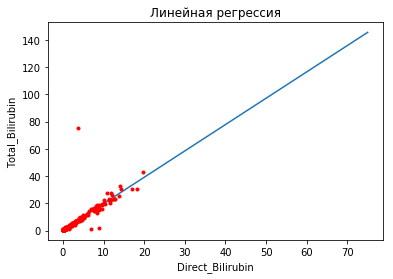

In [57]:
plt.xlabel('Direct_Bilirubin')
plt.ylabel('Total_Bilirubin')
plt.title('Линейная регрессия')
x = np.linspace(min(Direct_Bilirubin), max(Total_Bilirubin), 100)
y = model.coef_*x + model.intercept_
plt.plot(x,y)
plt.plot(Direct_Bilirubin, Total_Bilirubin, 'r.')
plt.show()

In [58]:
print('Сравниваем предсказание с фактическими значениями')
prediction = model.predict(np.array(Direct_Bilirubin).reshape(-1,1))
np.vstack((prediction[:5],data.Total_Bilirubin[:5])).T

Сравниваем предсказание с фактическими значениями


array([[ 0.61840295,  0.7       ],
       [11.06070443, 10.9       ],
       [ 8.35344108,  7.3       ],
       [ 1.19853081,  1.        ],
       [ 4.29254606,  3.9       ]])

Построить многомерную линейную регрессию для предсказания болезни (Dataset) от двух параметров. Параметры подобрать с помощью матрицы корреляций. Предсказать несколько значений из таблицы и сравнить результат модели от табличного значения.

Строим многомерную линейную регрессию по параметрам - Direct_Bilirubin, Alkaline Phosphotase


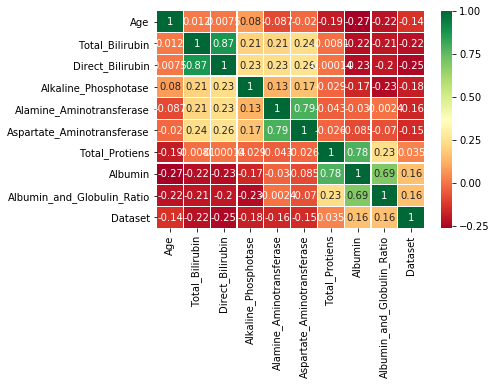

In [45]:
sns.heatmap(data.corr(), annot = True, cmap='RdYlGn',linewidths=0.2)
print('Строим многомерную линейную регрессию по параметрам - Direct_Bilirubin, Alkaline_Phosphotase')

In [59]:
Direct_Bilirubin = data.Direct_Bilirubin
Alkaline_Phosphotase = data.Alkaline_Phosphotase
model = LinearRegression()
x = data[['Direct_Bilirubin','Alkaline_Phosphotase']]
y = data['Dataset']

result = model.fit(x,y)

print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 1.4105809528676787
slope: [-0.03455122 -0.00025048]


In [60]:
print('Сравниваем предсказание с фактическими значениями')
prediction = model.predict(x)
np.vstack((prediction[:10],data.Dataset[:10])).T

Сравниваем предсказание с фактическими значениями


array([[1.3602853 , 1.        ],
       [1.04546081, 1.        ],
       [1.14618371, 1.        ],
       [1.35117235, 1.        ],
       [1.2926341 , 1.        ],
       [1.3342944 , 1.        ],
       [1.36509615, 1.        ],
       [1.34961779, 1.        ],
       [1.34961779, 2.        ],
       [1.33103031, 1.        ]])

Посчитать квартили для всех колонок. 

In [5]:
data.quantile([.25, .50, .75], axis = 0) 

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0.25,33.0,0.8,0.2,175.5,23.0,25.0,5.8,2.6,0.70,1.0
0.50,45.0,1.0,0.3,208.0,35.0,42.0,6.6,3.1,0.93,1.0
0.75,58.0,2.6,1.3,298.0,60.5,87.0,7.2,3.8,1.10,2.0


Построить график histogram двух выборок по наличию или отсутствию болезни: люди, возрастом до 50 лет, и люди после 50 лет. Посчитать среднее значение и квартиль 0.5 в данных выборках. Чем они отличаются?

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Наличие болезни у людей до 50 лет')

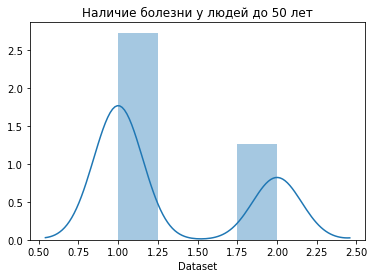

In [67]:
sns.distplot(data.Dataset[data['Age'] < 50])
plt.title('Наличие болезни у людей до 50 лет')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Наличие болезни у людей больше 50 лет')

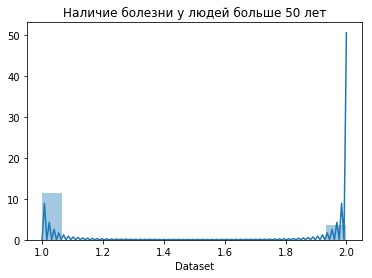

In [68]:
sns.distplot(data.Dataset[data['Age'] >= 50])
plt.title('Наличие болезни у людей больше 50 лет')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


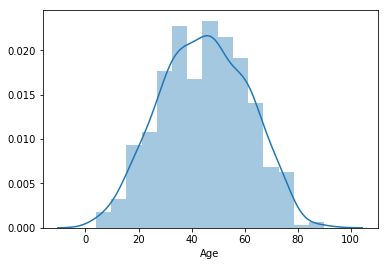

In [92]:
sns.distplot(data.Age)

In [94]:
print('Среднее значение выборки людей до 50 лет - {:.2f}'.format(data.Age[data['Age'] < 50].mean()))
print('Квартиль 0.5 выборки людей до 50 лет - {:.2f}'.format(data.Age[data['Age'] < 50].quantile(.5) ))
print('Среднее значение выборки людей после 50 лет - {:.2f}'.format(data.Age[data['Age'] >= 50].mean()))
print('Квартиль 0.5 выборки людей после 50 лет - {:.2f}'.format(data.Age[data['Age'] >= 50].quantile(.5) ))
print('')
print('Среднее значение и квартили различаются, до 50 лет квартиль смещен вправо, после 50 влево. на диаграмме выше видно, что основная выборка в районе 35-45 лет ')

Среднее значение выборки людей до 50 лет - 34.18
Квартиль 0.5 выборки людей до 50 лет - 35.00
Среднее значение выборки людей после 50 лет - 60.96
Квартиль 0.5 выборки людей после 50 лет - 60.00

Среднее значение и квартили различаются, до 50 лет квартиль смещен вправо, после 50 влево. на диаграмме выше видно, что основная выборка в районе 35-45 лет 



Посчитать критерий одновыборочный t-критерий для выборки по критерию Total_Bilirubin у больных людей. Как показатель помогает понять, что выборки не похожа на генеральную совокупность?

In [102]:
stats.ttest_1samp(data.Total_Bilirubin,data.Total_Bilirubin[data.Dataset == 1].mean())
print('p-value ниже стандартной альфа ошибки 0.05, поэтому можно говорить о статистических различиях между показателем Total_Bilirubin у больных людей и в целом по выборке')

p-value ниже стандартной альфа ошибки 0.05, поэтому можно говорить о статистических различиях между показателем Total_Bilirubin у больных людей и в целом по выборке


Посчитать критерий t для двух выборок: больные и здоровые (по критерию Total_Bilirubin). Имеют ли данные группы схожесть?

In [104]:
stats.ttest_ind(data.Total_Bilirubin[data.Dataset == 1],
                data.Total_Bilirubin[data.Dataset == 2])
print('p-value ниже стандартной альфа ошибки 0.05, поэтому в этом случае группы также различны')

Ttest_indResult(statistic=5.441441126834863, pvalue=7.801430929364345e-08)

Посчитать статистическую значимость для трех выборок (по возрасту) - 1ая группа от 1 до 30 лет, 2ая группа от 30 лет до 55, 3я группа более 55 по выборке Dataset. Сравнить с реальностью (они логично что будут отличаться).

In [110]:
print(stats.f_oneway(data.Dataset[data.Age < 30]
               , data.Dataset[(data.Age >= 30)&(data.Dataset < 55)]
               , data.Dataset[data.Age >= 55]))

print('p-value ниже стандартной альфа ошибки, что соответствует реальности, разный возраст, разные риски заболеваний')

F_onewayResult(statistic=9.959696365912507, pvalue=5.377265382192545e-05)
p-value ниже стандартной альфа ошибки, что соответствует реальности, разный возраст, разные риски заболеваний


Вопросы задавать на почту yustiks@gmail.com